<a href="https://colab.research.google.com/github/Hashbrownsss/Deep-CNN-Image-Classifier/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip list

Package                            Version
---------------------------------- ------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.11
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2025.1.6.0.33.42
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.3.0
audioread            

In [3]:
import tensorflow as tf
import os

In [4]:
gpus  = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [13]:
from zipfile import ZipFile

# Path to your zip file
zip_path = '/content/happy.zip'  # Replace with your zip file's path
extract_path = '/content/data/happy'  # Destination folder to extract files

# Extract the ZIP file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files have been extracted to: {extract_path}")


Files have been extracted to: /content/data/happy


In [15]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [16]:
data_dir = 'data'

In [17]:
os.listdir(os.path.join(data_dir, 'happy'))

['best_crop_9c19fb052aca8bc81700_6d687bf0-cd02-43d8-938a-c2743.jpg',
 '988689_Wallpaper2.jpg',
 'image (9).jpeg',
 'done_white_16dp.png',
 'images (3).jpeg',
 'image (5).jpeg',
 'habits-of-happy-people-jpg.jpg',
 'pexels-photo-3758119.jpeg',
 '383627315.jpg',
 'Screen-Shot-2012-10-23-at-12-57-22-PM.png',
 'AF2bZyjNQ3qKuKPTKQYMufowhz46I_CiKdYR8GjEWQlZxzcU5q4-s64-c-mo.jpeg',
 'Super-Happy-People-yay.jpg',
 'images (1).jpeg',
 'al-icon.png',
 'image (6).svg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed-800x45.jpg',
 'ACg8ocIBuLsMF18RZ3kRMKHxAF9ZmDNGva_TcImYTy0lT-pWQpJWcMWP-s12.png',
 'image (4).png',
 'friends-happy-190821-1490x838.jpg',
 'happy-people (1).jpg',
 'image (14).jpeg',
 'image (21).svg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA---_V1_FMjpg_U.jpg',
 'image_jumpstory-download20230421-155938_7a7b427.jpg',
 'happy-people-yellow-t-shirts-jumping-celebrating-victory-iso.jpg',
 'image (12).svg',
 'image (7).svg',
 'Copy-of-Rustic-Female-Teen-Magazine-Cover.jpg',


In [18]:
image_exts = ['jpeg', 'jpg', 'bmg', 'png']

In [19]:
img = cv2.imread(os.path.join('data', 'sad', '199816057.jpg'))

In [20]:
img.shape

(1119, 1500, 3)

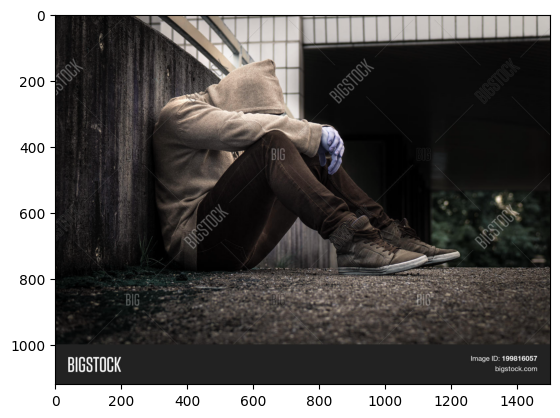

In [21]:
plt.imshow(img)

In [22]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issues with image {}'. format(image))
      #os.remove(image_path)

Image not in ext list data/sad/sad-young-woman-sitting-on-the-window-watching-out.jpg
Image not in ext list data/sad/image (6).svg
Image not in ext list data/sad/image (21).svg
Image not in ext list data/sad/image (12).svg
Image not in ext list data/sad/image (7).svg
Image not in ext list data/sad/desktop_searchbox_sprites318_hr.webp
Image not in ext list data/sad/image (14).svg
Image not in ext list data/sad/portrait-sad-man-600nw-126009806.jpg
Image not in ext list data/sad/image (2).svg
Image not in ext list data/sad/side-view-frustrated-thoughtful-woman-looking-out-rainy-wind.jpg
Image not in ext list data/sad/image (9).svg
Image not in ext list data/sad/sad-person-pictures-1920-x-1080-50n6grpzx04t1xn7.jpg
Image not in ext list data/sad/silhouette-depressed-man-sadly-sitting-260nw-2242641921.jpg
Image not in ext list data/sad/73705bd7debb66c2afc780a22c223804.jpg
Image not in ext list data/sad/image (10).svg
Image not in ext list data/sad/image (8).svg
Image not in ext list data/sad

In [23]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [24]:
import numpy as np
from matplotlib import pyplot as plt

In [25]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 231 files belonging to 2 classes.


In [26]:
data_itr = data.as_numpy_iterator()

In [27]:
batch = data_itr.next()

In [28]:
len(batch)

2

In [29]:
batch[0].shape

(32, 256, 256, 3)

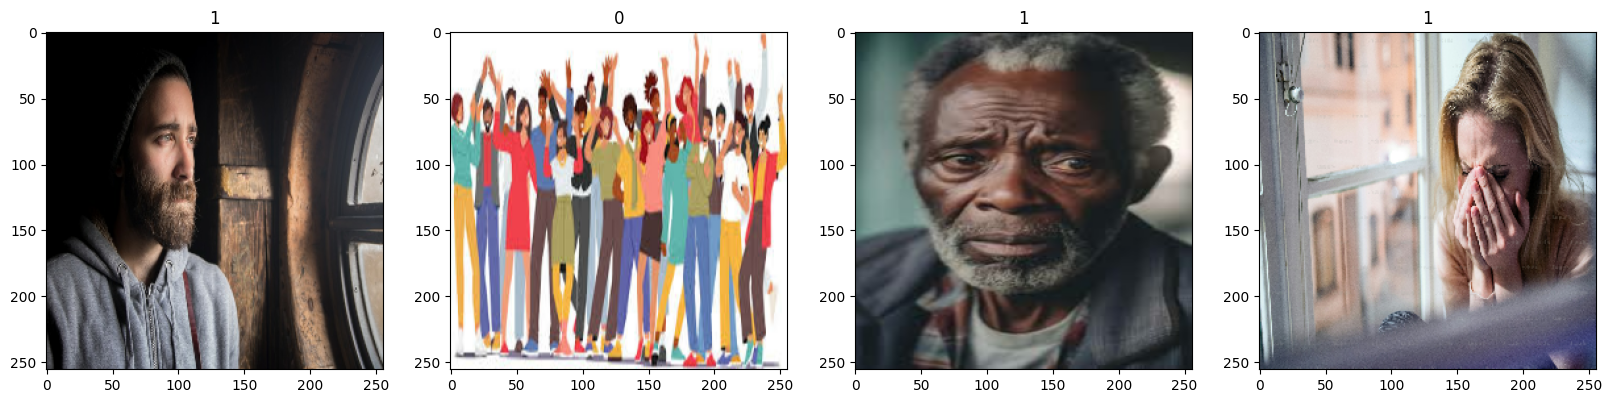

In [84]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [37]:
scaled  = batch[0]/255

In [38]:
data = data.map(lambda x,y: (x/255, y))

In [44]:
data.as_numpy_iterator().next()[0].max()

1.0

In [45]:
len(data)

8

In [50]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [53]:
train_size + val_size + test_size

8

In [54]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [58]:
model = Sequential()

In [59]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
logdir = "logs"

In [63]:
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [64]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorflow_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5415 - loss: 0.7110 - val_accuracy: 0.4844 - val_loss: 0.6742
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.5529 - loss: 0.6762 - val_accuracy: 0.7969 - val_loss: 0.6394
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.7721 - loss: 0.6039 - val_accuracy: 0.7500 - val_loss: 0.5237
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.7520 - loss: 0.5248 - val_accuracy: 0.8438 - val_loss: 0.4741
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.8404 - loss: 0.4648 - val_accuracy: 0.7812 - val_loss: 0.4224
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.8220 - loss: 0.3430 - val_accuracy: 0.9062 - val_loss: 0.3185
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.8369 - loss: 0.3660 - val_accuracy: 0.8750 - val_loss: 0.3108
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.8818 - loss: 0.3055 - val_accuracy: 0.9062 - val_loss: 0.2038
Epoch 9/

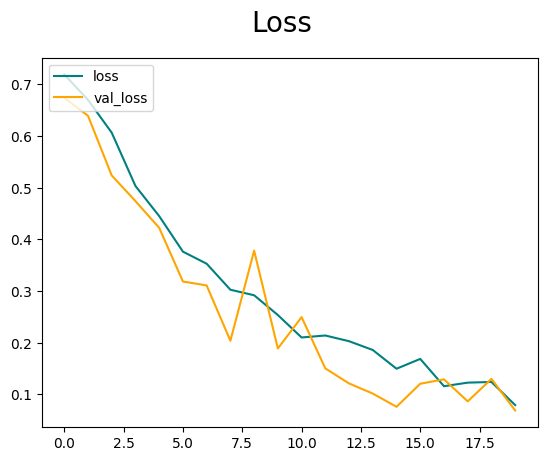

In [66]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc ="upper left")
plt.show()

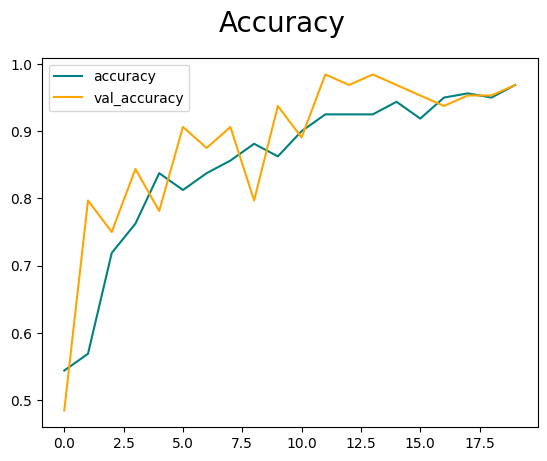

In [67]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize =20)
plt.legend(loc ="upper left")
plt.show()

In [68]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [70]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [71]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


In [72]:
print(f'precision: {pre.result().numpy()}, recall: {re.result().numpy()}, accuracy: {acc.result().numpy()}')

precision: 1.0, recall: 1.0, accuracy: 1.0


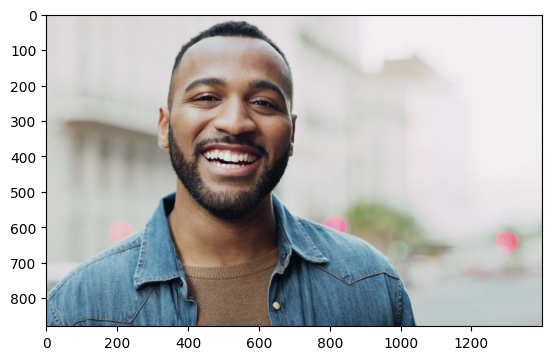

In [90]:
img = cv2.imread('happytest2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

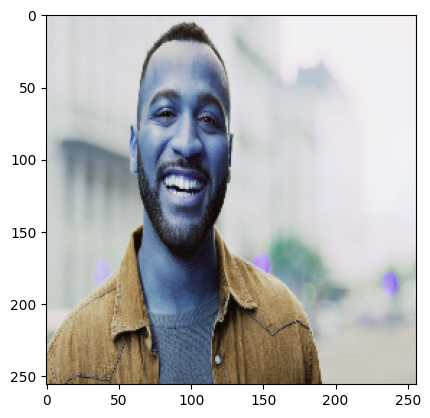

In [91]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [99]:
yhat = model.predict(np.expand_dims(resize/255, 0))

if yhat >0.5:
  print(f'Predicted class is Happy')
else:
  print(f'Predicted class is Sad')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class is Happy
